In [130]:
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np
import difflib
import spacy
import spacy.cli
import nltk
# spacy.cli.download("en_core_web_sm")
from nltk.corpus import stopwords
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [180]:
with open('C:/Hammad Aslam/BS IT (post ADP)/3rd Semester/Capstone Project/Project/backend/datasets/categories/allFiles/computers_laptops.json', 'r') as f:
    data = json.load(f)
data[0]
# print(len(data[0]['reviews']))

{'product_title': ['Compaq A1500 All In One'],
 'all_products_href': ['https://www.amazon.com/Compaq-163475-001-A1500-All-In-One/dp/B000055XZC/ref=sr_1_2161?qid=1700804379&s=computers-intl-ship&sr=1-2161'],
 'product_rating_points': ['3.2'],
 'product_ratings': ['5 ratings'],
 'product_price': ['$299.99 '],
 'product_images_src': ['https://m.media-amazon.com/images/I/51XfGoXrcKL.__AC_SY300_SX300_QL70_FMwebp_.jpg'],
 'product_description': ['Rated Best Buy by Consumer Guide Prints 2 400 x 1 200 dpi black text at 12 ppm color at 5 ppm 300 x 300 dpi fax resolution 42 page memory 70 number memory speed dialing 1 200 x 1 200 dpi copier resolution 36 bit scanner color depth compaq Control Form Image Color Matching and job finishing features'],
 'reviews': [{'reviews': '5.0 out of 5 stars Go For It without thinking twice !!',
   'reviewer_name': 'Someone',
   'review_title': 'Go For It without thinking twice !!',
   'review_rating': '5.0',
   'reviewer_country_date': 'Reviewed in the United S

In [175]:
# for index in range(len(data)):
def get_topics(index):
    topic = []
    for i in range(len(data[index]['reviews'])):
        for j in range(len(data[index]["reviews"][i]['review_topics'])):
            topic.append(data[index]["reviews"][i]['review_topics'][j])
    return topic, data[index]['product_title'][0]
topics, title = get_topics(5)
topics = [topic for topic in topics if topic != 'none']
len(topics), title

(14, 'ASUS N51Vn A1 15 6 Inch Versatile Entertainment Laptop Silver Blue')

In [165]:
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())  # Convert to lowercase for consistency
    return synonyms

# syn = list(get_synonyms(topics[9]))
# syn

In [172]:
def are_phrases_similar(phrase1, phrase2):
    # Tokenize and normalize phrases
    # tokens1 = set(word_tokenize(phrase1.lower()))
    # tokens2 = set(word_tokenize(phrase2.lower()))
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    new_record1 = re.sub(" +", " ",phrase1)
    new_record2 = re.sub(" +", " ",phrase2)
    doc1 = nlp(new_record1)
    doc2 = nlp(new_record2)
    for token in doc1:
        filtered_list = [token for token in doc1 if not token.is_stop]
        tokens1 = set([f"{token.lemma_}" for token in filtered_list])
        
    for token in doc2:
        filtered_list = [token for token in doc2 if not token.is_stop]
        tokens2 = set([f"{token.lemma_}" for token in filtered_list])
        
    # print(tokens1, tokens2)
    # Check if both phrases have similar tokens
    if tokens1 == tokens2:
        return True
    
    # Check for synonyms
    for token in tokens1:
        synonyms = get_synonyms(token)
        if tokens2.intersection(synonyms):
            return True
    
    return False

In [167]:
def are_similar(a, b, threshold=0.6):
    """
    Check if two strings are similar based on token similarity.
    """
    seq = difflib.SequenceMatcher(None, a, b)
    ratio = seq.ratio()
    # print(seq.ratio(), a, b)
    return ratio > threshold

In [178]:
def count_phrase_frequency_in_array(unique_array, original_array):
    frequency_counter = Counter()
    for i, phrase1 in enumerate(unique_array):
        count = 1
        for j, phrase2 in enumerate(original_array):
            if i != j:  # Avoid comparing a phrase with itself
                if are_phrases_similar(phrase1.lower(), phrase2.lower()):
                    count += 1
        frequency_counter[phrase1] = count
        # for phrase in original_array:
        #     if are_phrases_similar(phrase.lower(), phrase1.lower()):
        #         frequency_counter[phrase1] = count
    return frequency_counter


def get_unique(phrase_array):
    unique_pair = []
    count = 0
    for i in range(len(phrase_array)):
        for j in range(i+1, len(phrase_array)):
            if not are_phrases_similar(phrase_array[i], phrase_array[j]):
                # print(phrase_array[i], phrase_array[j])
                unique_pair.append(phrase_array[j])
            count += 1
            print(count)
    return unique_pair

In [183]:
unique = get_unique(topics)
frequency = count_phrase_frequency_in_array(list(set(unique)), topics)

1
2


KeyboardInterrupt: 

In [184]:
# topics = []
for index in range(len(data)):
    data[index]['topic_frequency'] = []
    if index == 0:
        # for i in range(len(data[index]['reviews'])):
        print(f"{(list(set(unique)))}\n{(dict(frequency))}")
        
        
        freq = dict(frequency)
        new = len(set(unique))
        temp = []
        for key, value in freq.items():
            # temp.append({'topic': key, 'freq': value})
            temp.append({'topic': key, 'freq': (int((value/new)*100))})
        sorted_freq = sorted(temp, key=lambda x: x['freq'], reverse=True)
        print(sorted_freq)
        x = []
        y = []
        for k in sorted_freq[0: 20]:
            x.append(k['topic'])
            y.append(k['freq'])
            # print(k['freq'])
# unique

['bad website', 'battery life', 'web browsing', 'Asus', 'product reviews', 'hunk of HP junk', 'power supply issues', 'jury-rigged', 'HP product', 'thermal paste', "RMA'd", 'hard drive failed']
{'bad website': 2, 'battery life': 1, 'web browsing': 2, 'Asus': 3, 'product reviews': 3, 'hunk of HP junk': 3, 'power supply issues': 1, 'jury-rigged': 2, 'HP product': 4, 'thermal paste': 2, "RMA'd": 2, 'hard drive failed': 2}
[{'topic': 'HP product', 'freq': 33}, {'topic': 'Asus', 'freq': 25}, {'topic': 'product reviews', 'freq': 25}, {'topic': 'hunk of HP junk', 'freq': 25}, {'topic': 'bad website', 'freq': 16}, {'topic': 'web browsing', 'freq': 16}, {'topic': 'jury-rigged', 'freq': 16}, {'topic': 'thermal paste', 'freq': 16}, {'topic': "RMA'd", 'freq': 16}, {'topic': 'hard drive failed', 'freq': 16}, {'topic': 'battery life', 'freq': 8}, {'topic': 'power supply issues', 'freq': 8}]


12


C:\Users\GS\AppData\Local\Temp\ipykernel_9328\3260308574.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


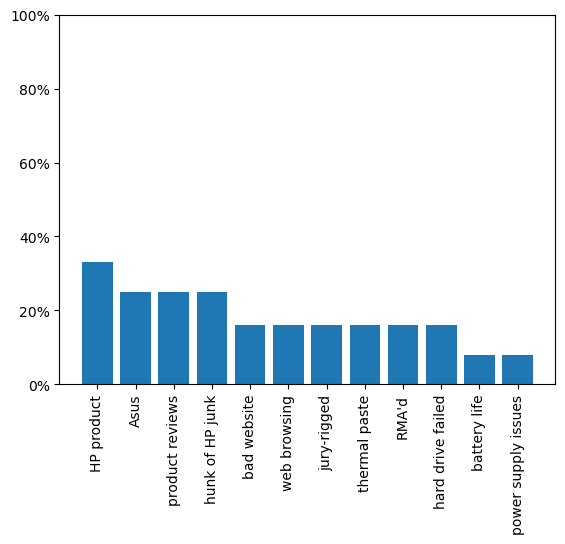

In [186]:
print(len(y))
fig, ax = plt.subplots()
bars = ax.bar(x, y)
scaled_y = [val / max(y) * 100 for val in y]
# plt.bar(x, scaled_y)
ax.set_ylim(0, 100)
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.xticks(rotation='vertical')
# plt.yticks(y, ['{}%'.format(i) for i in y])
# plt.grid()
plt.show()
